
Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

In [1]:
%%capture

!pip install category_encoders==2.*
!pip install eli5
!pip install pdpbox
!pip install shap

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# read the csv file

df = pd.read_csv('../data/seattle_01.csv')
print(df.shape)
df.head()

(7576, 18)


Unnamed: 0  room_id  host_id        room_type                     address  \
0           0     2318     2536  Entire home/apt  Seattle, WA, United States   
1           1     3335     4193  Entire home/apt  Seattle, WA, United States   
2           2     4291    35749     Private room  Seattle, WA, United States   
3           3     5682     8993  Entire home/apt  Seattle, WA, United States   
4           4     6606    14942  Entire home/apt  Seattle, WA, United States   

   reviews  overall_satisfaction  accommodates  bedrooms  bathrooms  price  \
0       21                   5.0             8       4.0        2.5    250   
1        1                   NaN             4       2.0        1.0    100   
2       63                   4.5             2       1.0        1.0     82   
3      462                   5.0             2       0.0        1.0     49   
4      134                   4.5             2       1.0        1.0     90   

                last_modified   latitude   longitude  \
0  2018-12-20 03:46:14.698548  47.610819 -122.290816   
1  2018-12-20 04:08:45.277643  47.529846 -122.275840   
2  2018-12-20 03:04:19.861014  47.687801 -122.313427   
3  2018-12-20 04:11:25.482975  47.523980 -122.359891   
4  2018-12-20 03:12:38.391711  47.654109 -122.337605   

                                            location  \
0  0101000020E6100000D449B6BA9C925EC0416326512FCE...   
1  0101000020E61000006FBBD05CA7915EC04DF564FED1C3...   
2  0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...   
3  0101000020E6100000FCC7427408975EC009E1D1C611C3...   
4  0101000020E6100000D47D00529B955EC07782FDD7B9D3...   

                                                name currency rate_type  
0  Casa Madrona - Urban Oasis, 1 block from the P...      USD   nightly  
1                Sweet Seattle Urban Homestead 2 Bdr      USD   nightly  
2                    Sunrise in Seattle Master Suite      USD   nightly  
3                Cozy Studio, min. to downtown -WiFi      USD   nightly  
4                Fab, private seattle urban cottage!      USD   nightly

In [4]:
# drop the column Unnamed: 0

df = df.drop(columns='Unnamed: 0')
df.head()

room_id  host_id        room_type                     address  reviews  \
0     2318     2536  Entire home/apt  Seattle, WA, United States       21   
1     3335     4193  Entire home/apt  Seattle, WA, United States        1   
2     4291    35749     Private room  Seattle, WA, United States       63   
3     5682     8993  Entire home/apt  Seattle, WA, United States      462   
4     6606    14942  Entire home/apt  Seattle, WA, United States      134   

   overall_satisfaction  accommodates  bedrooms  bathrooms  price  \
0                   5.0             8       4.0        2.5    250   
1                   NaN             4       2.0        1.0    100   
2                   4.5             2       1.0        1.0     82   
3                   5.0             2       0.0        1.0     49   
4                   4.5             2       1.0        1.0     90   

                last_modified   latitude   longitude  \
0  2018-12-20 03:46:14.698548  47.610819 -122.290816   
1  2018-12-20 04:08:45.277643  47.529846 -122.275840   
2  2018-12-20 03:04:19.861014  47.687801 -122.313427   
3  2018-12-20 04:11:25.482975  47.523980 -122.359891   
4  2018-12-20 03:12:38.391711  47.654109 -122.337605   

                                            location  \
0  0101000020E6100000D449B6BA9C925EC0416326512FCE...   
1  0101000020E61000006FBBD05CA7915EC04DF564FED1C3...   
2  0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...   
3  0101000020E6100000FCC7427408975EC009E1D1C611C3...   
4  0101000020E6100000D47D00529B955EC07782FDD7B9D3...   

                                                name currency rate_type  
0  Casa Madrona - Urban Oasis, 1 block from the P...      USD   nightly  
1                Sweet Seattle Urban Homestead 2 Bdr      USD   nightly  
2                    Sunrise in Seattle Master Suite      USD   nightly  
3                Cozy Studio, min. to downtown -WiFi      USD   nightly  
4                Fab, private seattle urban cottage!      USD   nightly

In [5]:
# converting values in address column to all lower letters

df['address'] = df['address'].str.lower()
print(df['address'].nunique())
print(df['address'].unique())

26
['seattle, wa, united states' 'kirkland, wa, united states'
 'bellevue, wa, united states' 'redmond, wa, united states'
 'mercer island, wa, united states' 'seattle, wa'
 'renton, wa, united states' 'ballard, seattle, wa, united states'
 'west seattle, wa, united states' 'medina, wa, united states'
 '西雅图, wa, united states' 'newcastle, wa, united states'
 'seattle , wa, united states' 'ballard seattle, wa, united states'
 'yarrow point, wa, united states' 'clyde hill, wa, united states'
 'tukwila, wa, united states' 'seattle, washington, us, wa, united states'
 'capitol hill, seattle, wa, united states' 'kirkland , wa, united states'
 'hunts point, wa, united states' 'seattle, dc, united states'
 'seattle, united states' 'vashon, wa, united states'
 'bothell, wa, united states' 'washington, wa, united states']


In [6]:
# creating new variables that contains certain word inside column: address

seattle = df['address'].str.contains('seattle')
kirkland = df['address'].str.contains('kirkland')
bellevue = df['address'].str.contains('bellevue')
redmond = df['address'].str.contains('redmond')
mercer_island = df['address'].str.contains('mercer')
newcastle = df['address'].str.contains('newcastle')
renton = df['address'].str.contains('renton')

In [7]:
# changing the value inside the column: address

df.loc[seattle, 'address'] = 'Seattle'
df.loc[kirkland, 'address'] = 'Kirkland'
df.loc[bellevue, 'address'] = 'Bellevue'
df.loc[redmond, 'address'] = 'Redmond'
df.loc[mercer_island, 'address'] = 'Mercer Island'
df.loc[newcastle, 'address'] = 'Newcastle'
df.loc[renton, 'address'] = 'Renton'
df.loc[~seattle & ~kirkland & ~bellevue & ~redmond & ~mercer_island & ~newcastle & ~renton, 'address'] = 'Other'

In [8]:
df['name'] = df['name'].str.lower()
df['name'].nunique()

7358

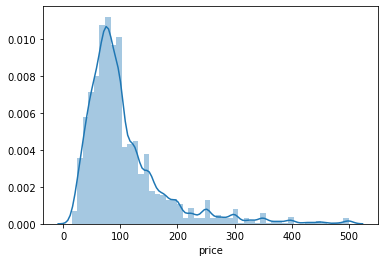

In [9]:
df = df[df['price'] <= 500]
sns.distplot(df['price'])
plt.show()

In [11]:
# split the dataset into train and test

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=0)
train.shape, test.shape

((6012, 17), (1503, 17))

In [12]:
# train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=0)
# train.shape, val.shape, test.shape

In [13]:
train.isnull().sum()

room_id                    0
host_id                    0
room_type                  0
address                    0
reviews                    0
overall_satisfaction    1162
accommodates               0
bedrooms                   0
bathrooms                  1
price                      0
last_modified              0
latitude                   0
longitude                  0
location                   0
name                       0
currency                   0
rate_type                  0
dtype: int64

In [112]:
# mean baseline for the airbnb price in seattle

train['price'].mean()

106.77345309381238

In [14]:
# define a function

def wrangle(data):
    '''wrangle data in train, and test'''
    
    # make a copy 
    data = data.copy()
    
    # replace 0 with np.nan in bedrooms column
    data['bedrooms'] = data['bedrooms'].replace(0, np.NaN)
    
    # drop high unique values for numerical features
    data = data.drop(columns = ['room_id', 'host_id', 'last_modified', 'location'], axis=1)
    
    # drop the constant categorical features
    data = data.drop(columns = ['currency', 'rate_type'])
    
#     # add mean value where the values are nan in bedroom column
#     data['bedrooms'] =  data['bedrooms'].fillna(data['bedrooms'].mean())
    
    # return the wrangle data
    return data

# apply the function to the datasets
train = wrangle(train)
# val = wrangle(val)
test = wrangle(test)

In [107]:
import plotly.express as px
px.scatter(df, 'bedrooms', 'price', trendline='ols')

In [108]:
import plotly.express as px
px.scatter(df, 'accommodates', 'price', trendline='ols')

In [17]:
import plotly.express as px
px.scatter(df, 'reviews', 'price', trendline='ols')

In [18]:
import plotly.express as px
px.scatter(df, 'latitude', 'price', trendline='ols')

In [19]:
import plotly.express as px
px.scatter(df, 'longitude', 'price', trendline='ols')

In [20]:
train.head()

room_type   address  reviews  overall_satisfaction  accommodates  \
3050  Entire home/apt  Kirkland        3                   5.0             4   
2120  Entire home/apt   Seattle       44                   4.5             3   
20    Entire home/apt   Seattle       76                   5.0             4   
5379  Entire home/apt   Seattle       37                   4.5             2   
1344  Entire home/apt   Seattle      119                   5.0             4   

      bedrooms  bathrooms  price   latitude   longitude  \
3050       2.0        2.0    142  47.676121 -122.195755   
2120       1.0        1.0    130  47.577700 -122.304235   
20         1.0        1.0    140  47.614471 -122.348145   
5379       NaN        1.0     55  47.663149 -122.334481   
1344       1.0        1.0     79  47.674540 -122.315692   

                                                   name  
3050                 kirkland urban living at it's best  
2120                    modern, private, mother-in-law.  
20    lively vacation home in seattle with puget sou...  
5379    ❤ beautiful cozy studio in vibrant neighborhood  
1344    great apartment near shops, parks, transit & uw

In [21]:
train.isnull().sum()

room_type                  0
address                    0
reviews                    0
overall_satisfaction    1162
accommodates               0
bedrooms                 711
bathrooms                  1
price                      0
latitude                   0
longitude                  0
name                       0
dtype: int64

In [147]:
target = 'price'
train_features = train.drop(columns=[target])
numerical_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality < 10].index.tolist()

features = numerical_features + categorical_features

# apply X features matrix and y vector

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6012, 9), (1503, 9), (6012,), (1503,))

# Linear Regression Model

In [148]:
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    LinearRegression(n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type', 'address'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Entire home/apt    1
Private room       2
Shared room        3
NaN               -2
dtype: int64},
                                         {'col': 'address',
                                          'data_type': dtype('O'),
                                          'mapping': Kirkland         1
Seattle          2
Bellevue         3
Redmond          4
Newcastle        5
Renton           6
Mercer Island    7
Other            8
NaN             -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('simpleimputer',
   

#### R^2 score for the test set with Linear Regression model

In [149]:
pipeline.score(X_test, y_test)

0.4825667015238688

#### Attributes for the linear model

In [150]:
lg = pipeline.named_steps['linearregression']

In [151]:
print(f'Coefficients for Linear Regression model: {lg.coef_}\n')
print(f'Intercept for Linear Regression model: {lg.intercept_}')

Coefficients for Linear Regression model: [ -0.12687394  14.71346033   3.16651976  27.02985418  24.13428063
  63.14546346 -79.97870173 -30.44031324   2.59464829]

Intercept for Linear Regression model: -12799.877355301933


#### Making predictions

In [152]:
y_pred = pipeline.predict(X_test)

In [153]:
y_pred

array([ 51.77390614,  60.13452694, 101.22850683, ..., 102.31846009,
        48.59542803,  89.78883454])

#### Mean absolute error (On average how far we are away from the mean or median)

In [154]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

34.30104718929901

# Ridge Regression

In [155]:
from sklearn.linear_model import Ridge

ridge_pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),
    Ridge(alpha=10)
)

ridge_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type', 'address'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Entire home/apt    1
Private room       2
Shared room        3
NaN               -2
dtype: int64},
                                         {'col': 'address',
                                          'data_type': dtype('O'),
                                          'mapping': Kirkland         1
Seattle          2
Bellevue         3...
Newcastle        5
Renton           6
Mercer Island    7
Other            8
NaN             -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('simpleimputer',
                 Si

#### R^2 score for the test set with Ridge Regression model

In [156]:
ridge_pipeline.score(X_test, y_test)

0.4955126843597223

#### Attributes for the ridge regression model

In [157]:
rg = ridge_pipeline.named_steps['ridge']

In [158]:
print(f'Coefficients for Linear Regression model: {rg.coef_}\n')
print(f'Intercept for Linear Regression model: {rg.intercept_}')

Coefficients for Linear Regression model: [ -0.1110628   12.99479165   0.9565418   33.38290488  21.61351451
  32.40249801 -49.88455122 -33.32684681   0.73054442]

Intercept for Linear Regression model: -7636.212894862726


#### Making predictions

In [159]:
ridge_y_pred = ridge_pipeline.predict(X_test)
ridge_y_pred

array([ 55.76202439,  62.81106852, 101.40821579, ..., 101.09556626,
        44.12074346,  94.0868308 ])

#### Mean absolute error on Ridge Regression(On average how far we are away from the mean or median)

In [160]:
mean_absolute_error(y_test, ridge_y_pred)

33.78285399304345

# Decision Tree Regressor

In [161]:
# import libraries

from sklearn.tree import DecisionTreeRegressor

dt_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    DecisionTreeRegressor(random_state=0)
)

# fit the model
dt_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type', 'address'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Entire home/apt    1
Private room       2
Shared room        3
NaN               -2
dtype: int64},
                                         {'col': 'address',
                                          'data_type': dtype('O'),
                                          'mapping': Kirkland         1
Seattle          2
Bellevue         3...
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse'

#### R^2 score for the test set with Decision Tree Regression model

In [162]:
print('Decision Tree Regression R^2:', dt_pipeline.score(X_test, y_test))

Decision Tree Regression R^2: 0.06139040468067314


#### Attribute for the Decision Tree model

In [163]:
dtr = dt_pipeline.named_steps['decisiontreeregressor']

In [164]:
print(f'Feature Importances for Decision Tree model: {rfr.feature_importances_}')

Feature Importances for Decision Tree model: [0.45879573 0.54120427]


#### Making predictions

In [165]:
dtr_y_pred = ridge_pipeline.predict(X_test)
dtr_y_pred

array([ 55.76202439,  62.81106852, 101.40821579, ..., 101.09556626,
        44.12074346,  94.0868308 ])

#### Mean absolute error(Decision Tree) (On average how far we are away from the mean or median)

In [166]:
mean_absolute_error(y_test, dtr_y_pred)

33.78285399304345

# Random Tree Regressor

In [168]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(random_state=0)
)

rf_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type', 'address'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Entire home/apt    1
Private room       2
Shared room        3
NaN               -2
dtype: int64},
                                         {'col': 'address',
                                          'data_type': dtype('O'),
                                          'mapping': Kirkland         1
Seattle          2
Bellevue         3...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
  

In [169]:
rf_pipeline.score(X_test, y_test)

0.5286904457831594

In [170]:
rfr = rf_pipeline.named_steps['randomforestregressor']
print(f'Feature Importances for Random Tree model: {rfr.feature_importances_}')

Feature Importances for Random Tree model: [0.10596002 0.01812626 0.0531431  0.36844835 0.07829451 0.16433568
 0.17101838 0.03297025 0.00770345]


#### Making predictions

In [171]:
rfr_y_pred = rf_pipeline.predict(X_test)
rfr_y_pred

array([ 51.01      ,  56.54      , 125.09607143, ..., 104.96666667,
        59.75      , 105.48      ])

#### Mean absolute error(Random Tree) (On average how far we are away from the mean or median)

In [172]:
mean_absolute_error(y_test, rfr_y_pred)

31.371583380857334

# Randomized Search CV

In [173]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=0)
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestregressor__n_estimators': randint(100, 400),
    'randomforestregressor__min_samples_leaf': randint(1, 20),
    'randomforestregressor__max_depth': [5, 10, 15,  None],
    'randomforestregressor__max_features': randint(1, 11)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=10,
    random_state=0,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

#### Best parameters choosen from the 5 fold with 100 iterations

In [174]:
search.best_params_

{'randomforestregressor__max_depth': 15,
 'randomforestregressor__max_features': 3,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 231,
 'simpleimputer__strategy': 'mean'}

#### Best cross-validation MAE from the Randomized Search CV

In [183]:
-search.best_score_

32.08811844515295

#### Test R^2 score

In [178]:
random_pipeline = search.best_estimator_
random_pipeline.score(X_test, y_test)

0.5469319600806646

#### Making predictions

In [179]:
rcv_y_pred = random_pipeline.predict(X_test)
rcv_y_pred

array([ 53.22406866,  64.45304222, 150.25440196, ..., 110.3678658 ,
        64.09569545,  96.29544597])

#### Mean absolute error

In [181]:
mean_absolute_error(y_test, rcv_y_pred)

30.71550752298965

In [189]:
randomized_cv = random_pipeline.named_steps['randomforestregressor']
randomized_cv.feature_importances_

array([0.09740343, 0.02218066, 0.16414283, 0.23580261, 0.15555062,
       0.12055115, 0.12413504, 0.07241716, 0.00781649])

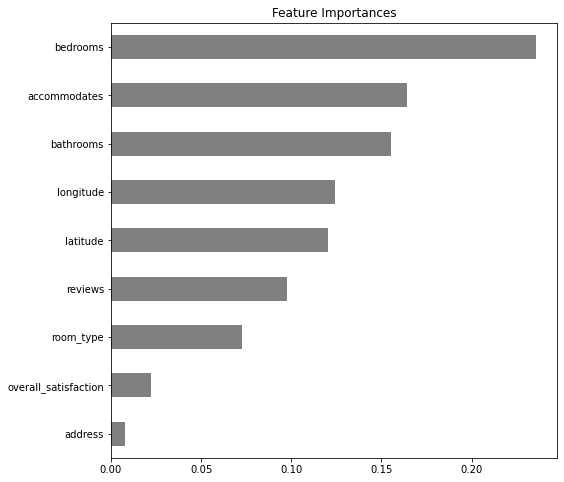

In [192]:
plt.figure(figsize=(8,8))
importances = pd.Series(randomized_cv.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey')
plt.title("Feature Importances")
plt.show()

In [214]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').head(75)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
93       2.693423      0.065423         0.101395        0.006086   
65       3.502383      0.042941         0.110404        0.013960   
17       4.361663      0.083392         0.124666        0.016772   
56       4.815433      0.151924         0.099193        0.015919   
10       1.461692      0.151718         0.103722        0.003888   
..            ...           ...              ...             ...   
32       2.497441      0.028327         0.096046        0.004138   
99       2.527111      0.073192         0.050966        0.007564   
80       1.304414      0.009810         0.039608        0.002951   
44       2.470763      0.084430         0.070167        0.002693   
0        2.212640      0.010879         0.058046        0.000400   

   param_randomforestregressor__max_depth  \
93                                     15   
65                                     15   
17                                     15   
56                                   None   
10                                     15   
..                                    ...   
32                                      5   
99                                      5   
80                                      5   
44                                      5   
0                                       5   

   param_randomforestregressor__max_features  \
93                                         3   
65                                         5   
17                                         5   
56                                         8   
10                                         1   
..                                       ...   
32                                         3   
99                                         7   
80                                         8   
44                                         5   
0                                          6   

   param_randomforestregressor__min_samples_leaf  \
93                                             2   
65                                             4   
17                                             4   
56                                             4   
10                                             1   
..                                           ...   
32                                             4   
99                                             8   
80                                            17   
44                                            11   
0                                              1   

   param_randomforestregressor__n_estimators param_simpleimputer__strategy  \
93                                       231                          mean   
65                                       236                          mean   
17                                       379                        median   
56                                       214                          mean   
10                                       153                        median   
..                                       ...                           ...   
32                                       370                          mean   
99                                       295                        median   
80                                       122                          mean   
44                                       282                        median   
0                                        351                        median   

                                               params  ...  mean_test_score  \
93  {'randomforestregressor__max_depth': 15, 'rand...  ...       -32.088118   
65  {'randomforestregressor__max_depth': 15, 'rand...  ...       -32.197421   
17  {'randomforestregressor__max_depth': 15, 'rand...  ...       -32.310639   
56  {'randomforestregressor__max_depth': None, 'ra...  ...       -32.355296   
10  {'randomforestregressor__max_depth': 15, 'rand...  ...       -32.371174   
..                               

### PDP with one feature

In [186]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'latitude'

isolated = pdp_isolate(
    model=random_pipeline,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature
)

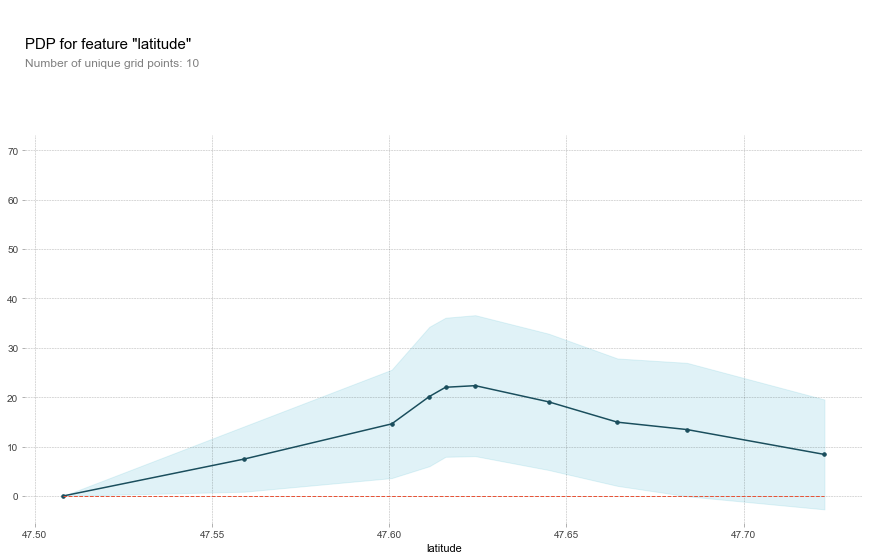

In [187]:
pdp_plot(isolated, feature_name=feature);

### PDP with two features

In [193]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [200]:
features = ['reviews', 'accommodates']

interaction = pdp_interact(
    model=random_pipeline,
    dataset=X_train,
    model_features=X_train.columns,
    features=features
)

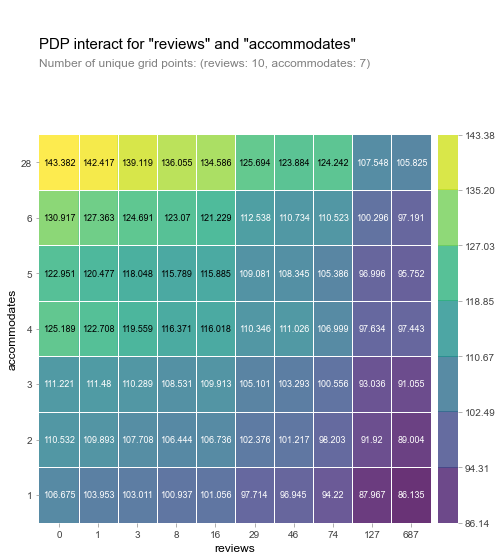

In [201]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features)
plt.show()